In [1]:
import csv
import matplotlib.pyplot as plt 
from matplotlib import cm
import pandas as pd
import numpy as np
import os

import scipy.stats

import statsmodels.stats.multitest
fdr = statsmodels.stats.multitest.fdrcorrection

import stats_utils
import plot_utils

get_moving_average = stats_utils.get_moving_average
mixed_effect_model = stats_utils.mixed_effect_model

# this should be your main project folder (startingblurry), one level up from "analysis"
root = os.path.dirname(os.getcwd())

#### make some names and colors for the plots

In [2]:
cond_names = ['scratch','pretrain_noblur', 'pretrain_blur1', 'pretrain_blur2']
gray_colors = cm.gray(np.linspace(0,1,4))[[1,2],:]
blue_color = cm.Blues(np.linspace(0,1,4))[2:3,:]
green_color = cm.Greens(np.linspace(0,1,4))[2:3,:]
cond_colors = np.concatenate([gray_colors, blue_color, green_color], axis=0)

#### Load evaluation on basic and subordinate categories separately

In [4]:
names = ['Control', 'NoBlur', 'Linear', 'NonLinear']

n_conds = 4; n_trials=10;
trials = np.arange(1,11)
    
basic_acc_bw = np.zeros((n_conds, n_trials))
basic_acc_col = np.zeros((n_conds, n_trials))

sub_acc_bw = np.zeros((n_conds, n_trials))
sub_acc_col = np.zeros((n_conds, n_trials))

for cc, name in enumerate(names):
    
    filename = os.path.join(root, 'labelAccuracy', 'BW', '%sLabelAccuracy.csv'%name)

    dat = pd.read_csv(filename)
    
    basic_acc_bw[cc,:] = np.array(dat)[0,1:n_trials+1]
    sub_acc_bw[cc,:] = np.array(dat)[1,1:n_trials+1]
    
    filename = os.path.join(root, 'labelAccuracy', 'Colored', '%sLabelAccuracy.csv'%name)

    dat = pd.read_csv(filename)
    
    basic_acc_col[cc,:] = np.array(dat)[0,1:n_trials+1]
    sub_acc_col[cc,:] = np.array(dat)[1,1:n_trials+1]
    

#### Load the "overall" accuracy (all imagenet categories)
Choose acc at best individual timepoint for each model, because this is the timepoint 
used to get basic/subordinate accs.

In [6]:
overall_acc_bw = np.zeros((n_conds, n_trials))
overall_acc_col = np.zeros((n_conds, n_trials))

for ti, tt in enumerate(trials):
    
    filename = os.path.join(root, 'trials', 'ColoredImgNet', \
                        '%d'%tt, 'trainingLogColoredModel.csv')    
    dat = pd.read_csv(filename)
    overall_acc_col[0,ti] = np.array(dat['Best Val Acc'])[-1]
    
    filename = os.path.join(root, 'trials', 'ColoredImgNet', \
                        '%d'%tt, 'trainingLogColoredNoBlurModel.csv')    
    dat = pd.read_csv(filename)
    overall_acc_col[1,ti] = np.array(dat['Best Val Acc'])[-1]
    
    filename = os.path.join(root, 'trials', 'ColoredImgNet', \
                        '%d'%tt, 'trainingLogColoredLinearBlurModel.csv')    
    dat = pd.read_csv(filename)
    overall_acc_col[2,ti] = np.array(dat['Best Val Acc'])[-1]

    filename = os.path.join(root, 'trials', 'ColoredImgNet', \
                        '%d'%tt, 'trainingLogColoredNonLinearBlurModel2.csv')    
    dat = pd.read_csv(filename)
    overall_acc_col[3,ti] = np.array(dat['Best Val Acc'])[-1]
    
    
    
    filename = os.path.join(root, 'trials', 'BWImgNet', \
                        '%d'%tt, 'trainingLogBWModel.csv')    
    dat = pd.read_csv(filename)
    overall_acc_bw[0,ti] = np.array(dat['Best Val Acc'])[-1]
    
    filename = os.path.join(root, 'trials', 'BWImgNet', \
                        '%d'%tt, 'trainingLogBWNoBlurModel.csv')    
    dat = pd.read_csv(filename)
    overall_acc_bw[1,ti] = np.array(dat['Best Val Acc'])[-1]
    
    filename = os.path.join(root, 'trials', 'BWImgNet', \
                        '%d'%tt, 'trainingLogBWLinearBlurModel.csv')    
    dat = pd.read_csv(filename)
    overall_acc_bw[2,ti] = np.array(dat['Best Val Acc'])[-1]
    
    filename = os.path.join(root, 'trials', 'BWImgNet', \
                        '%d'%tt, 'trainingLogBWNonLinearBlurModel2.csv')    
    dat = pd.read_csv(filename)
    overall_acc_bw[3,ti] = np.array(dat['Best Val Acc'])[-1]
    

In [7]:
# pairwise comparisons: control vs blur 1, control vs blur 2, blur 1 vs blur 2, etc
# 6 possible pairwise comparisons here
conds_compare = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]

cond_comparisons = ['%s vs %s'%(cond_names[cc[0]], cond_names[cc[1]]) for cc in conds_compare]

tvals_basicsub_bw = np.zeros((len(conds_compare),3))
pvals_basicsub_bw = np.zeros((len(conds_compare),3))
tvals_basicsub_col = np.zeros((len(conds_compare),3))
pvals_basicsub_col = np.zeros((len(conds_compare),3))

for cc, conds in enumerate(conds_compare):
    
    t,p = scipy.stats.ttest_ind(overall_acc_bw[conds[0],:],overall_acc_bw[conds[1],:], axis=0)
    tvals_basicsub_bw[cc,0] = t;
    pvals_basicsub_bw[cc,0] = p;
    
    t,p = scipy.stats.ttest_ind(basic_acc_bw[conds[0],:],basic_acc_bw[conds[1],:], axis=0)
    tvals_basicsub_bw[cc,1] = t;
    pvals_basicsub_bw[cc,1] = p;
    
    t,p = scipy.stats.ttest_ind(sub_acc_bw[conds[0],:],sub_acc_bw[conds[1],:], axis=0)
    tvals_basicsub_bw[cc,2] = t;
    pvals_basicsub_bw[cc,2] = p;
    
    
    t,p = scipy.stats.ttest_ind(overall_acc_col[conds[0],:],overall_acc_col[conds[1],:], axis=0)
    tvals_basicsub_col[cc,0] = t;
    pvals_basicsub_col[cc,0] = p;
    
    t,p = scipy.stats.ttest_ind(basic_acc_col[conds[0],:],basic_acc_col[conds[1],:], axis=0)
    tvals_basicsub_col[cc,1] = t;
    pvals_basicsub_col[cc,1] = p;
    
    t,p = scipy.stats.ttest_ind(sub_acc_col[conds[0],:],sub_acc_col[conds[1],:], axis=0)
    tvals_basicsub_col[cc,2] = t;
    pvals_basicsub_col[cc,2] = p;
    

#### FDR correction

mask_basicsub_bw, pvals_basicsub_bw_corr = fdr(pvals_basicsub_bw.ravel(), alpha=0.05)
mask_basicsub_bw = np.reshape(mask_basicsub_bw, (len(conds_compare), 3))

mask_basicsub_col, pvals_basicsub_col_corr = fdr(pvals_basicsub_col.ravel(), alpha=0.05)
mask_basicsub_col = np.reshape(mask_basicsub_col, (len(conds_compare), 3))


#### Plot results for grayscale model

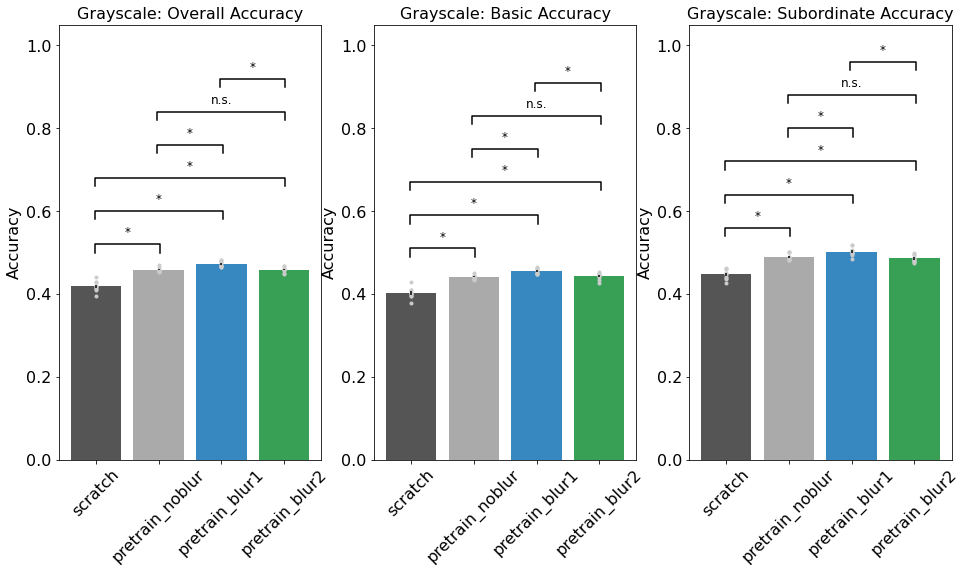

In [9]:
plt.rcParams['pdf.fonttype']=42
plot_utils.set_all_font_sizes(16)

offsets = [0, -0.01, 0.04]

plt.figure(figsize=(16,8))
pi=0;
for vals, name, mask_fdr in zip([overall_acc_bw, basic_acc_bw, sub_acc_bw], \
                                ['Overall', 'Basic', 'Subordinate'], \
                            [mask_basicsub_bw[:,0], mask_basicsub_bw[:,1], mask_basicsub_bw[:,2]]):
    pi+=1
    plt.subplot(1,3,pi)
    
    meanvals = np.mean(vals, axis=1)
    semvals = np.std(vals, axis=1)/np.sqrt(n_trials)
    
    plt.bar(np.arange(n_conds), meanvals, color=cond_colors)
    plt.errorbar(np.arange(n_conds), meanvals, semvals, color='k', linestyle='none',zorder=15)
    for cc in range(n_conds):
        plt.plot(cc*np.ones((n_trials,)), vals[cc,:], '.', color=[0.8, 0.8, 0.8], zorder=10)
    plt.xticks(np.arange(n_conds), cond_names, rotation=45)

    plt.ylim([0.0, 1.05])

    # add brackets for comparisons
    # the significance tests are already done, last timepoint from above plots
    bracket_text = ['*' if mask else 'n.s.' for mask in mask_fdr]

    hts = np.linspace(0.5, 0.90, len(conds_compare))+offsets[pi-1]
    vert_space = 0.02
    horiz_space=0.02
    xpairs = conds_compare
    for ii in range(len(xpairs)):

        plt.plot(
                [xpairs[ii][0]-horiz_space, xpairs[ii][0]-horiz_space, \
                 xpairs[ii][1]+horiz_space, xpairs[ii][1]+horiz_space],
                [hts[ii], hts[ii]+vert_space, hts[ii]+vert_space, hts[ii]],
                "-",
                color="k",
            )

        plt.gca().annotate(
            bracket_text[ii],
            xy=(np.mean(xpairs[ii]), hts[ii]+vert_space*2),
            zorder=10,
            color="k",
            ha="center",
            fontsize=12,
        )

    plt.title('Grayscale: %s Accuracy'%name);
    plt.ylabel('Accuracy')
    
fn2save = os.path.join(root, 'analysis', 'figures', 'ImageNet_bestacc_grayscale.pdf')
plt.savefig(fn2save)